<a href="https://colab.research.google.com/github/Obreintelly/Univariate_Bivariate_Analysis_in_R/blob/main/Univariate_Bivariate_Analysis_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction and Overview**

**a). Study Question/Context**


> A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads.


**b). Metric For Success**



> Analysis, Visualization and Findings on individuals most likely to click on adds


**c). Experimental Design**


> 1. Data Cleaning


> 2. Data Analysis


> 3. Recommendations & Conclusions















# **2. Installing Packages & Libraries**

In [2]:
#We will be working with data tables thus we install data.table package

install.packages("data.table")

#We will need a data manipulation package

#install.packages("dplyr")

#We will also need to get a package to support visualizations and dataframe 
#operations including data cleaning
install.packages("tidyverse")

#Installing GGPLOT2 to support visualization
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:



#Getting the packages

library(data.table)

#library(dplyr)

library(tidyverse)

library(ggplot2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



# **Loading Dataset**

In [4]:
advert <- fread('http://bit.ly/IPAdvertisingData')

# **3. Previewing the Dataset**

In [5]:
#Checking Class of the Dataset
class(advert)

[1] "data.table" "data.frame"

We are working with a DataFrane

In [6]:
#Checking for the shape/size of the dataset

dim(advert)

[1] 1000   10

There are 10 Columns and 1000 rows in the dataset

In [7]:
#Checking the first 6 rows

head(advert)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [8]:
#Checking the last 6 rows
tail(advert)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [9]:
#Checking Columns in the dataset
colnames(advert)

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

In [10]:
#Checking datatypes of the columns
str(advert)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : POSIXct, format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicked on Ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [11]:
#Most of our columns are of numeric type
#Double-checking and identifying such columns

numeric <- unlist(lapply(advert, is.numeric))

In [12]:
#Displaying the Numeric Values in the Dataset
numeric

Daily Time Spent on Site                      Age              Area Income 
                    TRUE                     TRUE                     TRUE 
    Daily Internet Usage            Ad Topic Line                     City 
                    TRUE                    FALSE                    FALSE 
                    Male                  Country                Timestamp 
                    TRUE                    FALSE                    FALSE 
           Clicked on Ad 
                    TRUE

# **4. Data Cleaning**

In [13]:
#Checking for Missing Data in columns

colSums(is.na(advert))

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

There are no missing entries in the dataset's columns

In [14]:
#Checking whether there are any duplicates in the dataset
advert[duplicated(advert),]

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>


There are no duplicated rows in the dataset

In [15]:
#Renaming Columns to make them precise

names(advert)[1] <- "Browse_time"

names(advert)[4] <- "Net_usage"

names(advert)[10] <- "Clicks"

names(advert)[5]  <- "Line"

names(advert)[3]  <- "Income"
names(advert)[7]  <- 'Gender'


In [16]:
#Preview Dataset
head(advert, 3)

Browse_time,Age,Income,Net_usage,Line,City,Gender,Country,Timestamp,Clicks
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [17]:
#Checking for Unique Values in Male Column to ensure alignment with expectations

distinct(select(advert, Gender ))

Gender
<int>
0
1


In [18]:
#Checking for unique values in the Clicks
distinct(select(advert, Clicks))

Clicks
<int>
0
1


In [19]:
#Checking for Unique Values in the City Column
distinct(select(advert, City))

City
<chr>
Wrightburgh
West Jodi
Davidton
West Terrifurt
South Manuel
Jamieberg
Brandonstad
Port Jefferybury
West Colin


In [20]:
#Gender and Clicks are erroneously classed as integers
#They are categorical features. Therefore we convert them
#to factors

advert$Gender <- factor(advert$Gender)

advert$Clicks <- factor(advert$Clicks)

#Checking Structure of Data
str(advert)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Browse_time: num  69 80.2 69.5 74.2 68.4 ...
 $ Age        : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Income     : num  61834 68442 59786 54806 73890 ...
 $ Net_usage  : num  256 194 236 246 226 ...
 $ Line       : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City       : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Gender     : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 1 2 2 2 ...
 $ Country    : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp  : POSIXct, format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicks     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


# **6. Exploratory Data Analysis**

# **Univariate Analysis**

In [21]:
summary(advert)

  Browse_time         Age            Income        Net_usage    
 Min.   :32.60   Min.   :19.00   Min.   :13996   Min.   :104.8  
 1st Qu.:51.36   1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8  
 Median :68.22   Median :35.00   Median :57012   Median :183.1  
 Mean   :65.00   Mean   :36.01   Mean   :55000   Mean   :180.0  
 3rd Qu.:78.55   3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8  
 Max.   :91.43   Max.   :61.00   Max.   :79485   Max.   :270.0  
     Line               City           Gender    Country         
 Length:1000        Length:1000        0:519   Length:1000       
 Class :character   Class :character   1:481   Class :character  
 Mode  :character   Mode  :character           Mode  :character  
                                                                 
                                                                 
                                                                 
   Timestamp                   Clicks 
 Min.   :2016-01-01 02:52:10   0:500  
 1st 

The average daily Browse_time was 65 while the maximum time spent online was 91 . The minimum browse time was 33.


The minimum and maximum age was 19 and 61 respectively.The average age was 36 years. 

Most individuals earn around 55,000. The least and highest incomes were 13996 and 79485 respectively.  


The minimum and maximum internet Usage was 104 and 270 respectively. The average internet use was 180

In [22]:
# Computing Mode of Numerical Columns
#We need to leverage the power of functions to do this

#getmode <- function(v) {
#  uniqv <- unique(v)
#  uniqv[which.max(tabulate(match(v, uniqv)))]
#}

#getmode(Age)

In [23]:
#Individuals below the mean Age
below.mean <- filter(advert, Age<36.01)


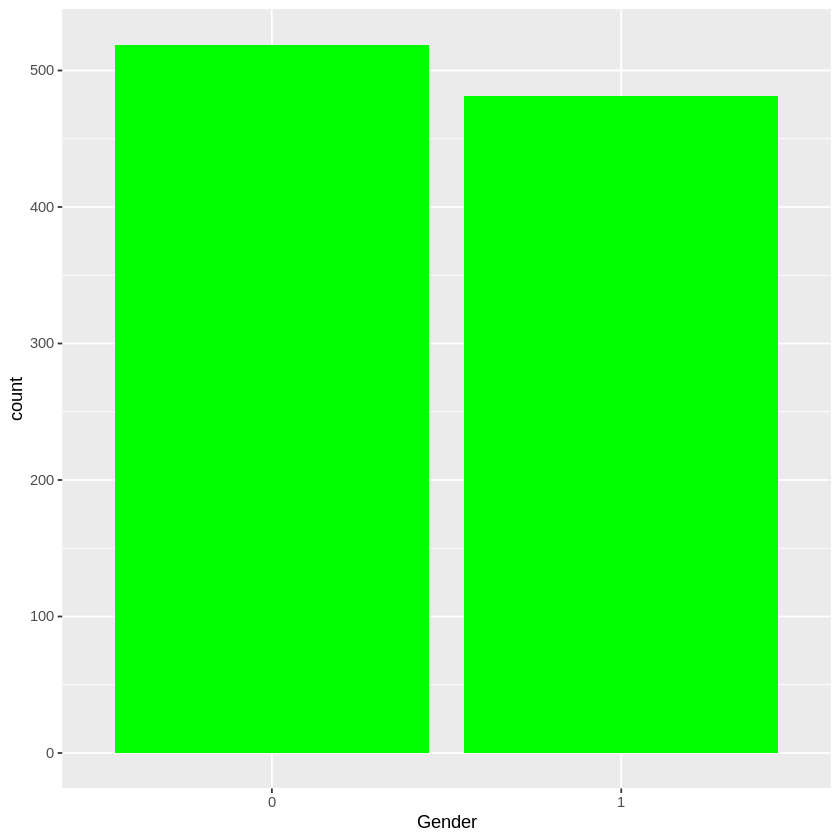

In [24]:
a <- ggplot(advert, aes(x = Gender))
print(a + geom_bar(fill= 'green'))

In [25]:
#ggplot(advert, aez(x"", y=Gender, fill= category)) + geom_bar(stat = )

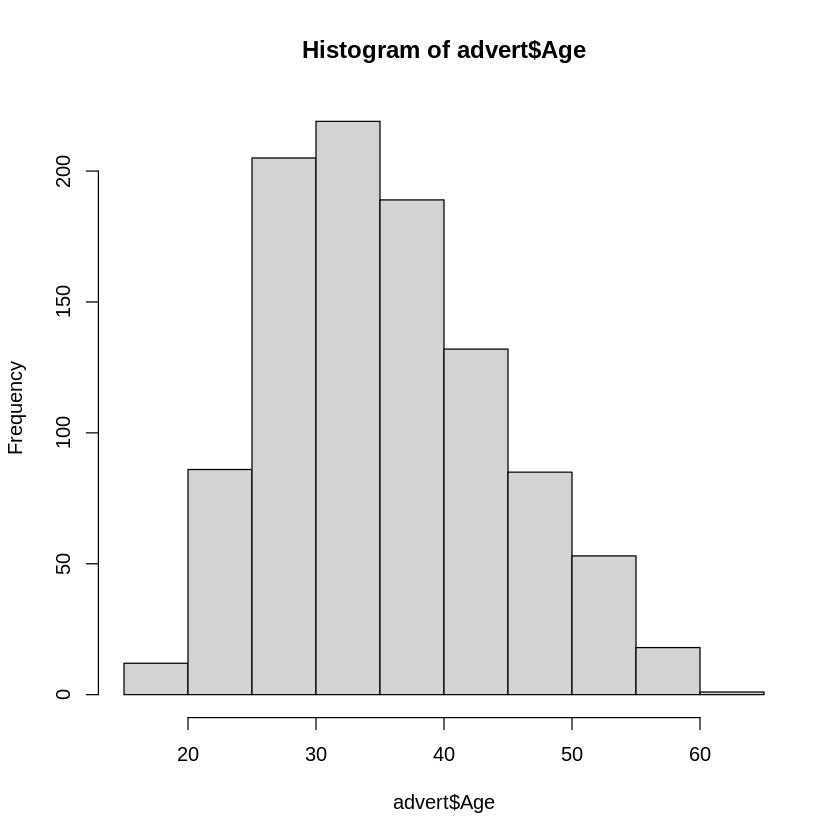

In [27]:
hist(advert$Age)

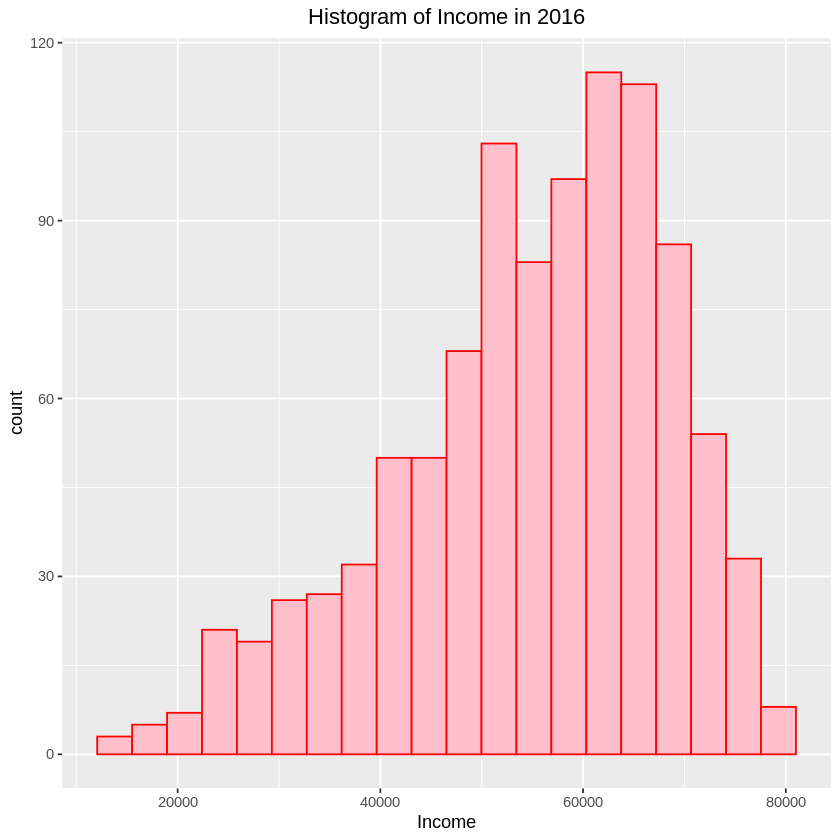

In [28]:
#Histogram of Income
pl <- ggplot(advert, aes(x = Income))

p2 <- (pl + geom_histogram( bins = 20, color='red', fill = 'pink'))

print(p2 + ggtitle("Histogram of Income in 2016") + theme(plot.title = element_text(hjust = 0.5)) )



# **Bivariate Analysis**

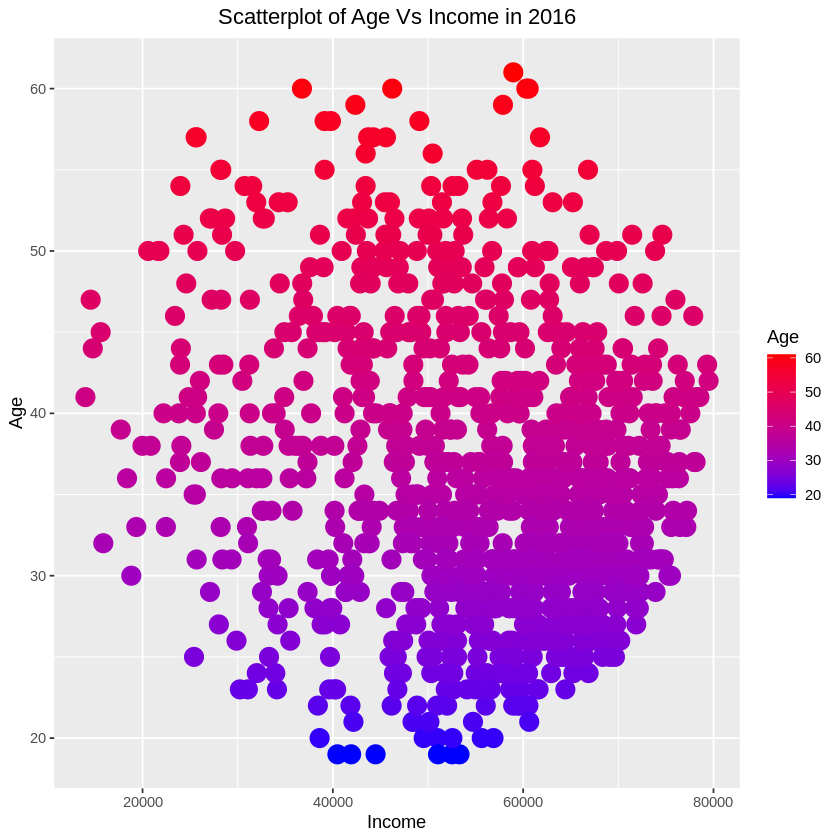

In [30]:
#b1 <- ggplot(advert, aes(x=Age, y=Income))

#print(b1 + geom_point())
b1 <- ggplot(advert, aes(x=Income, y=Age))

b2 <- b1 + geom_point(aes(color=Age), size=5) + scale_color_gradient(low='blue', high = 'red')
print(b2 + ggtitle("Scatterplot of Age Vs Income in 2016") + theme(plot.title = element_text(hjust = 0.5)))

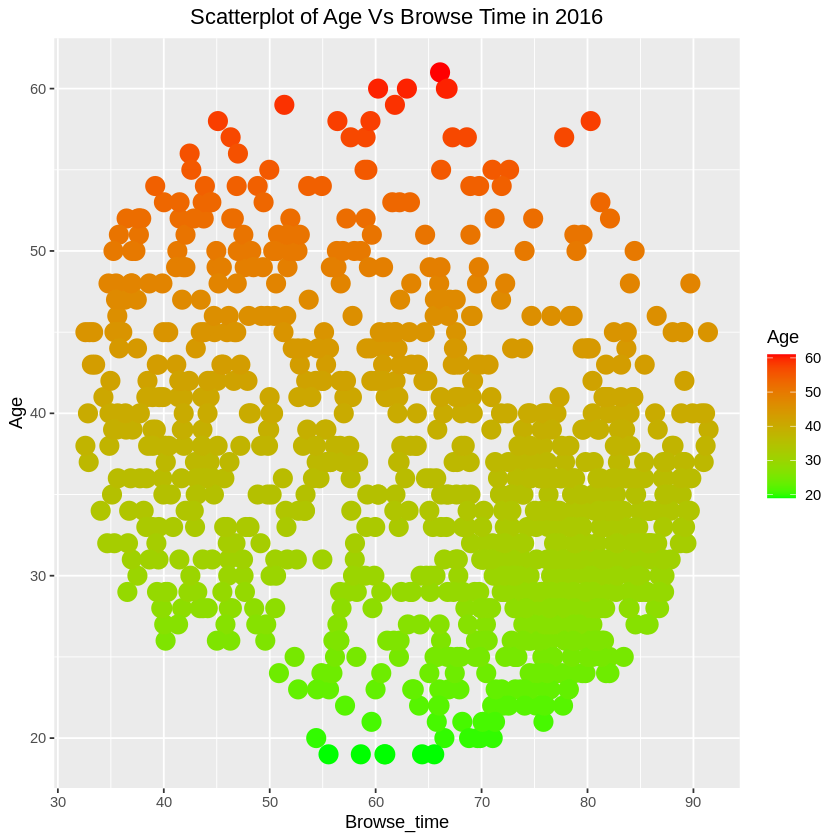

In [31]:
b2 <- ggplot(advert, aes(x=Browse_time, y=Age))

b3 <- b2 + geom_point(aes(color=Age), size=5) + scale_color_gradient(low='green', high = 'red')
print(b3 + ggtitle("Scatterplot of Age Vs Browse Time in 2016") + theme(plot.title = element_text(hjust = 0.5)))

From the above plot, individuals between ages 25 and 45 spend the most amount of time online. 

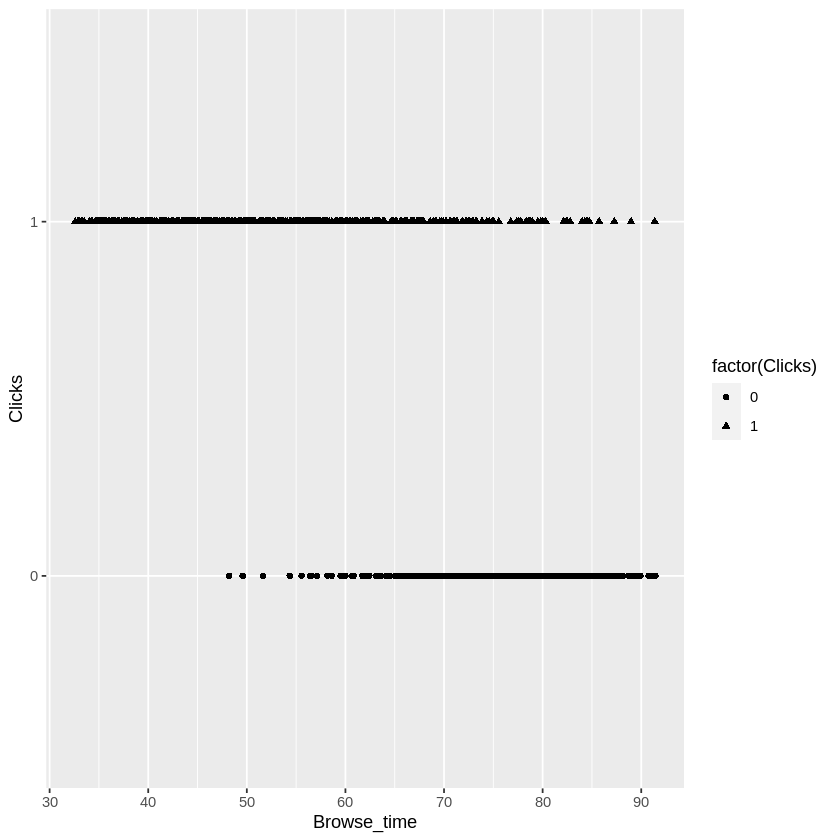

In [32]:
b3 <- ggplot(advert, aes(x=Browse_time, y=Clicks))

print(b3 + geom_point(aes(shape=factor(Clicks))))